In [2]:
# @author Asif Ahshmi
# used and tweaked by 
# MARIE Nordine
# MAZOUZ Yasmine
# SCHNEIDER-MAUNOURY Aymeric
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)

We're using TF 1.15.0


# MLP

In [3]:
import keras


def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

Using TensorFlow backend.


X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


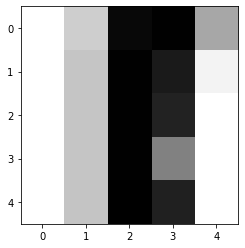

And the whole sample:


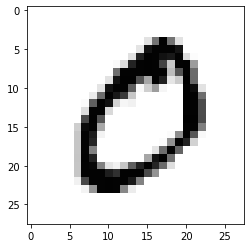

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [5]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [6]:
import keras

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [7]:
# Model parameters: W and b
W = tf.get_variable(shape = (784,10),name = 'weights') ### YOUR CODE HERE ### tf.get_variable(...) with shape[0] = 784
b = tf.get_variable(shape = (10), name ='bias')### YOUR CODE HERE ### tf.get_variable(...)

In [8]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape = (None,784) )### YOUR CODE HERE ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder('float32',shape = (None,10))### YOUR CODE HERE ### tf.placeholder(...) for one-hot encoded true labels

In [24]:
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###

'''On peut changer la fonction d'activation'''
logits = tf.layers.dense(input_X,784,activation = tf.nn.relu) 
logits12 = tf.layers.dense(logits,256,activation = tf.nn.relu)
logits13 = tf.layers.dense(logits12,256,activation = tf.nn.relu)
logits14 = tf.layers.dense(logits13,256,activation = tf.nn.relu)
logits2 = tf.layers.dense(logits14,10)


probas = tf.nn.softmax(logits2)
classes = tf.argmax(probas,axis = 1) ### YOUR CODE HERE ### apply tf.argmax to find a class index with highest probability

# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = input_y,logits = logits2)) ### YOUR CODE HERE ### cross-entropy loss

'''On peut changer la fonction de perte'''

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer(0.003).minimize(loss) ### YOUR CODE HERE ### optimizer step that minimizes the loss

In [14]:
from matplotlib import pyplot as plt
from IPython.display import clear_output, display_html, HTML
import contextlib
import time
import io
import urllib
import base64


def clear_and_display_figure(fig, sleep=0.01):
    img_data = io.BytesIO()
    fig.savefig(img_data, format='jpeg')
    img_data.seek(0)
    uri = 'data:image/jpeg;base64,' + urllib.request.quote(base64.b64encode(img_data.getbuffer()))
    img_data.close()
    clear_output(wait=True)
    display_html(HTML('<img src="' + uri + '">'))
    time.sleep(sleep)


class SimpleMovieWriter(object):
    """
    Usage example:
        anim = animation.FuncAnimation(...)
        anim.save(None, writer=SimpleMovieWriter(sleep=0.01))
    """
    def __init__(self, sleep=0.1):
        self.sleep = sleep

    def setup(self, fig):
        self.fig = fig

    def grab_frame(self, **kwargs):
        clear_and_display_figure(self.fig, self.sleep)

    @contextlib.contextmanager
    def saving(self, fig, *args, **kwargs):
        self.setup(fig)
        try:
            yield self
        finally:
            pass


class SimpleTrainingCurves(object):
    def __init__(self, loss_name, metric_name):
        self.fig, (self.ax1, self.ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        self.ax1.set_title(loss_name)
        self.ax2.set_title(metric_name)
        self.train_loss_curve, = self.ax1.plot([], [], 'r', label='train', lw=2)
        self.valid_loss_curve, = self.ax1.plot([], [], 'g', label='valid', lw=2)
        self.train_metric_curve, = self.ax2.plot([], [], 'r', label='train', lw=2)
        self.valid_metric_curve, = self.ax2.plot([], [], 'g', label='valid', lw=2)
        self.iter = 0
        self.y_limits_1 = [None, None]
        self.y_limits_2 = [None, None]
        plt.close(self.fig)

    def _update_y_limits(self, limits, *values):
        limits[0] = min(list(values) + ([limits[0]] if limits[0] else []))
        limits[1] = max(list(values) + ([limits[1]] if limits[1] else []))

    def _update_curve(self, curve, value, label):
        x, y = curve.get_data()
        curve.set_data(list(x) + [self.iter], list(y) + [value])
        curve.set_label("{}: {}".format(label, value))

    def _set_y_limits(self, ax, limits):
        spread = limits[1] - limits[0]
        ax.set_ylim(limits[0] - 0.05*spread, limits[1] + 0.05*spread)

    def add(self, train_loss, valid_loss, train_metric, valid_metric):
        self._update_curve(self.train_loss_curve, train_loss, "train")
        self._update_curve(self.valid_loss_curve, valid_loss, "valid")
        self._update_curve(self.train_metric_curve, train_metric, "train")
        self._update_curve(self.valid_metric_curve, valid_metric, "valid")
        self.ax1.set_xlim(0, self.iter)
        self.ax2.set_xlim(0, self.iter)
        self._update_y_limits(self.y_limits_1, train_loss, valid_loss)
        self._update_y_limits(self.y_limits_2, train_metric, valid_metric)
        self._set_y_limits(self.ax1, self.y_limits_1)
        self._set_y_limits(self.ax2, self.y_limits_2)
        clear_and_display_figure(self.fig)
        self.ax1.legend()
        self.ax2.legend()
        self.iter += 1

In [26]:
s = tf.Session()
s.run(tf.global_variables_initializer())

'''On peut changer ces deux paramètres'''
BATCH_SIZE = 512
EPOCHS = 20


simpleTrainingCurves = SimpleTrainingCurves("cross-entropy", "accuracy")

for epoch in range(EPOCHS):
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        batch_losses.append(batch_loss)

    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuN%2BOP7QHwm/Zx8JW/jT4veJ5dPtL7U4dN0u2stLub%2B91K9lDGO1tLO0jluLudlR2EUMbvtR2xhWI7KvFv2u/gP8VPiX4h%2BGfxl%2BBd14fl8X/CrxjPrWmaJ4tu57bTdYhudLvdMubaW4ghmktH8q9aSOdYZtrR7TGyu2ACjpH/AAUr/Y71rxmfh5bePfEEGtwaVDqmradqPw5160k0WxkNwFu9S8%2ByQaZADazhpbswohTDFSygzeE/%2BCj/AOxr4z8H%2BIfHWmfFi5tdP8MaPa6vqg1zwnqumXEmn3LmO1vLW3u7WKa%2Bt55AY4ZbZJUmchIyzEA%2Bd3n7DHxn%2BOtp%2B0i37Qt74V8MS/tB/CPTvB0kfgrWLrUzo7RWusWsr%2BbcWtqZ1VNRiZDsXeyygogxuytY/Y2/at%2BM%2Btaz8UP2lPh38G9X1e0%2BE6eBtB8E6d4n1QaRrSy6jaXt5fXd2bBJ9PYmyg%2BzxQw3BtnDP50hIwAeyX/7fP7N2leAbH4h6tdeOLSHVPED6Jpeh3Xwj8SR67e3yW5uXjh0dtPGoSqsAMpkS3KBFZi2Acen%2BEvHXhvxr4JsfiHotxcxaVqFgt5BLqmnz2MscJXdmWG5SOWBgPvJIqspBDAEEV8a237DP7WkvwUk8LePvC/hTxpfQ/EOXW/Beg6z%2B0P4rt7vwHYnTYrURaf4tj09tWuJDKLuVvMhjAjvDCG2RjPqfg/9gzVfFPwF0bwt%2B038dfHHiPx8nw2uvC2v%2BIdJ%2BIetW%2BmXQubW5t5Jn0tbpLG8mRLpgt1cWzTO0UUrFXRNgBt%2BGP8AgpJ%2Bxl4v8PeJPFmjfFq5XTPC3gy88XX99feEtVtIr3QLVd1xqmntPaoNVtEBXM9l56EyRgEmRA3E/Gj/AIK6fsw%2BA/2Z/ib%2B0D8K31nxnd/DfwbD4kbwy3hfWNNm1exuHaO1u7V5rAtcWMsiMPt8Ec1siqzs4VSR474X/wCCUPxoX4J%2BL/hZ4s8O%2BHpPEP8AwoXxH4B8F%2BPNR/aH8beIEkuNSsI7TzDpGqpJbaNbSGGJ5Y4JLpk8qNULBBn0f9qX/gnN8UP2gLDxVomh%2BMfDulW2vfsr33w0tZZnnYwatJcRywztGsQBtRsIJDeYM8J3oA9Ul/4KKfss2/ibw14EvNX8a23iTxdp0uoaD4UvPhJ4lh1eWziu/sclzJYSaeLm3hSYjdJNGiKjLKSI2VzL4G/4KJ/sd/EjVNV0rwh8W5JzpWiahrK3c/hrUre01TT7Fgl5d6bczW6Q6rDCxUO9k86qXUE/MM4vgj4AfHnxj%2B1TY/tQfHPw/wCDvD8knwcv/B%2BqaJ4T8V3eqmC5l1aO5SSG5n0%2BzLxNBEpYmNGSQ7QrqokPgM37Dn7S/wANv2efC/hT40a14EHhH9m74H%2BJNA8F6n4VvruTUvFO7QjplvcXtvLbRRacEs0ZpIYpboSTsrh41QKQD6B8Kf8ABUv9hfxp4N1n4haH8ZbtdF0LwcfFt1qN/wCDNYs47nQQUD6rZ%2BfaIb%2BzjMiCSe2EscW4eYy5r121%2BMHw5vfi5cfAqz8RibxVZ%2BGoNfu9MitZWEOnTzy28M7yhPKXzJYJ1RC%2B9vJkIUhGI%2BKv2R/2fviF4s%2BCXwh%2BO37b%2BpfDLRfhh8N/2X7nw/BJp2tzhNX03VNO0s3l9qv2qCGHTIIrTTlVoEluEzK8jTKsarXYf8EVvhX470f9nfU/j18VvFreItY8a30Gm%2BHPEMsDRyX3hHRIv7K0S4Ifn/SoYZtUJ7vqzkBQQoAPsqiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvEdI/4KMfse6ld69Z6n8Urzw83hzw5c%2BINQk8a%2BEdV0GObSbd0jnv7WTUrWBb63R5IlaW2MqAyxjOXXPtN7FczWcsNndCCZ4mWKYx7/LYjhtp64POO9fmJq/8AwRy/bl%2BL%2BreF9c%2BN3xx0N9b8NeD9Qs9Q8Uah8VvE3iceIdb%2B2aVfWuonS76KGy0m2kudMXz7CyAURybVlkCoFAPtl/2//wBmG1%2BGjfFjWPEHirStLbXINGsbPXPhlr9hqmp38yGSGCy024sUvb9pEDOv2eGQMqOwJCMR0XgP9qz4H/EfX7Lwn4c8Q6pDq9/4Un8SQ6RrXhXUtMu002G7%2BySyyw3lvFJA6z/IYZFWXvs2815N8Tvg5%2B278Ym%2BHvxt1zwb8KtD%2BIfwo8dTax4f8M2vjjUr/Rdcs7jSbvTLmO4vn0qGaxmKXskkbpa3AjMQU%2BYJGxV%2BJPwG/bg1/wCMvh39prwPo3wrtPFl98MNV8F%2BMdC1LxXqUlhpC3F/DdWt/ZXCacJNQMQjdZLeWK0EpcYlixyAdxpP/BRv9kDxHr3gXwt4V%2BI2q6zqfxJ8G6V4t8G6dongfWb2e80PUX2WuoyJBaM1rb7seZJOI1twymbygwJ2Phr%2B25%2Bzd8V/iNc/Cfwz4v1az1%2B30u51OGy8T%2BDNW0Rb%2Bxt5Ejnu7KXUbWCO/gjeWIPLbNIi%2BYhJAZSfKP2FP2Evix%2BzDr/w41nx54g8NXZ8HfspeEfhjfvpFzPKzatpbzNczReZBHutW3psZirtt%2BaNMCvGvhp/wSr/AGxvE/xR8L%2BJv2pvjDZ6pFp/gDxX4X8aeJoPi/4k1q88RS6vYpbf2na6ZfQx6foRypY2lopRcqBM4jVaAPqXwn/wUX/ZH8a6LH4q0Hx3rn9h3Gq6Xp%2Bn%2BJb34f63a6VqMupXsdlZSWl9PZpbXkEtzNFGLiCR4QZULOFYE%2Bl%2BFvi78PPGvxA8U/C7wv4h%2B1654Lks4/E9olpMFsZLqD7RBGZWQRu7QlZCiMzIskZYKJE3fMPjjwJ8RfCv/BPbxp8CP%2BChnif4VeCPAWg/DSLQLb4meHfFt2GadI0trXUntLqzgTTZlmFvJDBHcXTGcoiOTtDdr/wSv%2BH3xY8N/siaV8Vf2irBLf4nfFi%2Bl8dfESFLdovs9/frGYbTY3zJ9lsY7Kz2nJAtcGgD6NooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACq2s6

# CNN

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random

sess = tf.InteractiveSession()

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [29]:
# placeholders   (x)  et (y)
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [30]:
x_input = tf.reshape(x, [-1, 28, 28, 1])

In [31]:
# premiere couche de convolution
# 32 filtres de 5x5 avec le pas de  1, ReLU 
conv1 = tf.layers.conv2d(inputs=x_input, filters=32, kernel_size=[5,5], activation=tf.nn.relu)
# une couche de pooling pour réduire la taille du réseau
# 2x2 max pooling et pas de 2
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=[2,2])

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


In [32]:
# deuxieme couche

conv2 = tf.layers.conv2d(inputs=pool1, filters=48, kernel_size=[5,5], activation=tf.nn.relu)
# le pooling correspondant


pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=[2,2])

In [33]:

# couche Conv  1: 24x24 noeuds , 32 feature maps
# Max pooling 1: 12x12 noeuds , 32 feature maps
# Conv 2: 8x8 noeuds , 48 feature maps
# Max pooling 2: 4x4 , 48 feature maps
input_height = 28
conv1_height = (input_height - 5 + 2*0) + 1
pool1_height = conv1_height / 2
conv2_height = (pool1_height - 5 + 2*0) + 1 #TODO
pool2_height = conv2_height / 2 #TODO

In [34]:
flat = tf.layers.flatten(pool2)

Instructions for updating:
Use keras.layers.flatten instead.


In [35]:
# on ajoute deux couches denses
fc1 = tf.layers.dense(inputs=flat, units=512, activation=tf.nn.relu)
# attention c'est la derniere couche du cnn, il faut que le nombre de sorties soit egal au dix probabilités des chiffres

y_pred = tf.layers.dense(inputs=fc1, units=10) 

# softmax fait une moyenne sur les dix outputs et sort des probabilités

probabilities = tf.nn.softmax(y_pred)

In [36]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

In [37]:
optimizer = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [38]:
prediction=tf.argmax(y_pred,1)

In [39]:
tf.summary.scalar('loss',cross_entropy) 
tf.summary.scalar('acc',accuracy)

merged_summary_op = tf.summary.merge_all() #procedure d'affichage groupée dans tensorboard

100%|██████████| 200/200 [00:07<00:00, 27.75it/s]


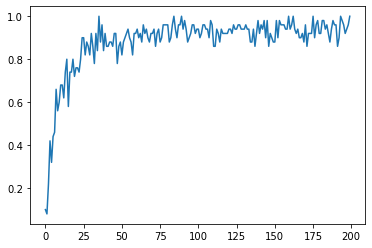

Validation accuracy: 0.9644
Model saved in file: ./model1
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



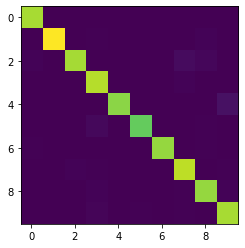

In [40]:
import uuid
num_iterations = 200

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, 'my_project') 
    #uniq_id = "./logs/lab2part1_"+uuid.uuid1().__str__()[:6]
    #summary_writer = tf.summary.FileWriter(uniq_id, graph=tf.get_default_graph())
    training_perf = []
    for i in tqdm.tqdm(range(num_iterations)):
        batch = mnist.train.next_batch(50)

        feed_dict = {x: batch[0], y: batch[1]}
        (_, train_accuracy, summary) = sess.run([optimizer,accuracy, merged_summary_op], feed_dict=feed_dict)
        training_perf.append(train_accuracy)
        #summary_writer.add_summary(summary, i) 

    # now plotting the variation of training performance
    plt.plot(range(num_iterations), training_perf)
    plt.show()
    
    # we now evaluate the validation accuracy
    print('Validation accuracy: %g' % accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    save_path = saver.save(sess,'./model1')
    print("Model saved in file: %s" % save_path)
    # we now plot the confusion matrix on the validation accuracy
    preds = prediction.eval(feed_dict={x: mnist.test.images})
    conf_mat = tf.contrib.metrics.confusion_matrix(labels=tf.argmax(mnist.test.labels,1), predictions=preds, num_classes=10)
    plt.imshow(conf_mat.eval())
